# DỰ BÁO CHỈ SỐ AQI, SỬ DỤNG VECM

# Tổng quan dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Dữ liệu Lịch sử ACB.csv')

In [4]:
df.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,28-04-23,"24,200.00","24,200.00","24,400.00","24,150.00",9.77M,0.21%
1,27-04-23,"24,150.00","24,200.00","24,450.00","24,100.00",2.18M,0.00%
2,26-04-23,"24,150.00","24,150.00","24,200.00","23,950.00",3.86M,0.00%
3,25-04-23,"24,150.00","24,300.00","24,450.00","24,100.00",6.17M,-0.21%
4,24-04-23,"24,200.00","24,300.00","24,450.00","24,100.00",2.27M,-0.21%
5,21-04-23,"24,250.00","24,300.00","24,400.00","24,250.00",2.47M,0.00%


In [5]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1346,1346,1346,1346,1346,1346,1346
unique,1346,608,584,606,611,920,555
top,28-04-23,"10,830.80","25,000.00","25,000.00","11,323.10",2.69M,0.00%
freq,1,13,15,15,16,5,123


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1346 non-null   object
 1   Price     1346 non-null   object
 2   Open      1346 non-null   object
 3   High      1346 non-null   object
 4   Low       1346 non-null   object
 5   Vol.      1346 non-null   object
 6   Change %  1346 non-null   object
dtypes: object(7)
memory usage: 73.7+ KB


# Tiền xử lý dữ liệu

In [7]:
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,28-04-23,24200.0,24200.0,24400.0,24150.0,9770000,0.0021
1,27-04-23,24150.0,24200.0,24450.0,24100.0,2180000,0.0000
2,26-04-23,24150.0,24150.0,24200.0,23950.0,3860000,0.0000
3,25-04-23,24150.0,24300.0,24450.0,24100.0,6170000,-0.0021
4,24-04-23,24200.0,24300.0,24450.0,24100.0,2270000,-0.0021
...,...,...,...,...,...,...,...
1341,07-12-17,10837.1,10447.9,10837.1,10447.9,8300000,0.0373
1342,06-12-17,10447.9,10447.9,10627.5,10328.1,9810000,-0.0029
1343,05-12-17,10477.8,10956.8,10956.8,10477.8,8189999,-0.0411
1344,04-12-17,10926.9,10537.7,10956.8,10537.7,9450000,0.0369


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1346 non-null   object 
 1   Price     1346 non-null   float64
 2   Open      1346 non-null   float64
 3   High      1346 non-null   float64
 4   Low       1346 non-null   float64
 5   Vol.      1346 non-null   int64  
 6   Change %  1346 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 73.7+ KB


In [10]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,28-04-23,24200.0,24200.0,24400.0,24150.0,9770000,0.0021
1,27-04-23,24150.0,24200.0,24450.0,24100.0,2180000,0.0000
2,26-04-23,24150.0,24150.0,24200.0,23950.0,3860000,0.0000
3,25-04-23,24150.0,24300.0,24450.0,24100.0,6170000,-0.0021
4,24-04-23,24200.0,24300.0,24450.0,24100.0,2270000,-0.0021
...,...,...,...,...,...,...,...
1341,07-12-17,10837.1,10447.9,10837.1,10447.9,8300000,0.0373
1342,06-12-17,10447.9,10447.9,10627.5,10328.1,9810000,-0.0029
1343,05-12-17,10477.8,10956.8,10956.8,10477.8,8189999,-0.0411
1344,04-12-17,10926.9,10537.7,10956.8,10537.7,9450000,0.0369


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df = df.sort_values('Date')

In [15]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
1345,2017-01-12,10537.7,10477.8,10567.6,10417.9,7360000,0.0086
1344,2017-04-12,10926.9,10537.7,10956.8,10537.7,9450000,0.0369
1343,2017-05-12,10477.8,10956.8,10956.8,10477.8,8189999,-0.0411
1342,2017-06-12,10447.9,10447.9,10627.5,10328.1,9810000,-0.0029
1341,2017-07-12,10837.1,10447.9,10837.1,10447.9,8300000,0.0373
1340,2017-08-12,10777.2,10837.1,10837.1,10687.4,3400000,-0.0055
1339,2017-11-12,10597.6,10747.3,10747.3,10477.8,7890000,-0.0167
1338,2017-12-12,10358.1,10567.6,10657.4,9549.8,22150000,-0.0226
1337,2017-12-13,10118.6,10358.1,10417.9,9879.1,5370000,-0.0231
1336,2017-12-14,10238.3,10118.6,10268.3,10058.7,6130000,0.0118


In [16]:
df.to_csv('ACB.csv', index=False)

# Tách dữ liệu thành train, test và validate theo tỉ lệ 7:2:1

In [17]:
df = pd.read_csv('ACB.csv')

In [18]:
train_size = int(len(df) * 0.9)
test_size = int(len(df) * 0.075)
validate_size = int(len(df) * 0.025)

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
validate_data = df[train_size+test_size:]

In [19]:
# In ra kích thước của các tập dữ liệu
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", validate_data.shape)

Train data shape: (1211, 7)
Test data shape: (100, 7)
Validation data shape: (35, 7)


In [20]:
train_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-01-12,10537.7,10477.8,10567.6,10417.9,7360000,0.0086
1,2017-04-12,10926.9,10537.7,10956.8,10537.7,9450000,0.0369
2,2017-05-12,10477.8,10956.8,10956.8,10477.8,8189999,-0.0411
3,2017-06-12,10447.9,10447.9,10627.5,10328.1,9810000,-0.0029
4,2017-07-12,10837.1,10447.9,10837.1,10447.9,8300000,0.0373
...,...,...,...,...,...,...,...
1206,2022-10-05,24640.0,24240.0,24800.0,23920.0,4810000,0.0065
1207,2022-10-06,25200.0,25200.0,25800.0,25150.0,2280000,-0.0214
1208,2022-10-08,24850.0,24950.0,25050.0,24750.0,1990000,-0.0040
1209,2022-10-10,18700.0,18200.0,19100.0,18200.0,6470000,0.0027


In [21]:
test_data

,Date,Price,Open,High,Low,Vol.,Change %
1211,2022-10-13,19950.0,18700.0,19950.0,18500.0,3900000,0.0668
1212,2022-10-14,20850.0,20500.0,20900.0,20200.0,3140000,0.0451
1213,2022-10-17,20950.0,20300.0,21000.0,20250.0,3760000,0.0048
1214,2022-10-18,21400.0,21300.0,21500.0,21100.0,2770000,0.0215
1215,2022-10-19,21100.0,21600.0,21600.0,21000.0,1450000,-0.0140
...,...,...,...,...,...,...,...
1306,2023-03-28,24450.0,24650.0,24800.0,24450.0,8289999,0.0000
1307,2023-03-29,24400.0,24500.0,24600.0,24350.0,15180000,-0.0020
1308,2023-03-30,24600.0,24600.0,24700.0,24550.0,2120000,0.0082
1309,2023-03-31,25000.0,24700.0,25250.0,24650.0,5880000,0.0163


In [22]:
validate_data

,Date,Price,Open,High,Low,Vol.,Change %
1311,2023-04-04,25150.0,25250.0,25350.0,25050.0,7190000,-0.0040
1312,2023-04-13,24950.0,24950.0,25050.0,24850.0,2520000,0.0040
1313,2023-04-14,24950.0,25050.0,25100.0,24850.0,5020000,0.0000
1314,2023-04-17,25000.0,24950.0,25000.0,24800.0,1650000,0.0020
1315,2023-04-18,24750.0,25000.0,25000.0,24750.0,2100000,-0.0100
1316,2023-04-19,24400.0,24800.0,24800.0,24400.0,4600000,-0.0141
1317,2023-04-20,24250.0,24500.0,24550.0,24200.0,2470000,-0.0061
1318,2023-04-21,24250.0,24300.0,24400.0,24250.0,2470000,0.0000
1319,2023-04-24,24200.0,24300.0,24450.0,24100.0,2270000,-0.0021
1320,2023-04-25,24150.0,24300.0,24450.0,24100.0,6170000,-0.0021


# Thực hiện dự đoán AQI cho các ngày trong tương lai sử dụng mô hình Vector Error Correction Model (VECM)

# Bước 1: Kiểm tra tính ổn định của các biến sử dụng Augmented Dickey-Fuller test

In [23]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'{col}:')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
            if result[0] > result[4]['5%']:
                print(f'{col} is non-stationary\n')
            else:
                print(f'{col} is stationary\n')

In [24]:
check_stationarity(train_data[['Open', 'High', 'Low', 'Vol.', 'Change %']])

Open:
ADF Statistic: -0.553060
p-value: 0.881240
Critical Values:
	1%: -3.436
Open is non-stationary

	5%: -2.864
Open is non-stationary

	10%: -2.568
Open is non-stationary

High:
ADF Statistic: -0.554649
p-value: 0.880904
Critical Values:
	1%: -3.436
High is non-stationary

	5%: -2.864
High is non-stationary

	10%: -2.568
High is non-stationary

Low:
ADF Statistic: -0.567030
p-value: 0.878259
Critical Values:
	1%: -3.436
Low is non-stationary

	5%: -2.864
Low is non-stationary

	10%: -2.568
Low is non-stationary

Vol.:
ADF Statistic: -2.231405
p-value: 0.195045
Critical Values:
	1%: -3.436
Vol. is non-stationary

	5%: -2.864
Vol. is non-stationary

	10%: -2.568
Vol. is non-stationary

Change %:
ADF Statistic: -23.489873
p-value: 0.000000
Critical Values:
	1%: -3.436
Change % is stationary

	5%: -2.864
Change % is stationary

	10%: -2.568
Change % is stationary



# Bước 2: Chuyển sang dữ liệu ổn định sử dụng first difference

In [25]:
train_diff = train_data[['Open', 'High', 'Low', 'Vol.', 'Change %']].diff().dropna()

# Kiểm tra lại tính ổn định

In [26]:
check_stationarity(train_diff)

Open:
ADF Statistic: -11.465238
p-value: 0.000000
Critical Values:
	1%: -3.436
Open is stationary

	5%: -2.864
Open is stationary

	10%: -2.568
Open is stationary

High:
ADF Statistic: -11.330117
p-value: 0.000000
Critical Values:
	1%: -3.436
High is stationary

	5%: -2.864
High is stationary

	10%: -2.568
High is stationary

Low:
ADF Statistic: -11.332855
p-value: 0.000000
Critical Values:
	1%: -3.436
Low is stationary

	5%: -2.864
Low is stationary

	10%: -2.568
Low is stationary

Vol.:
ADF Statistic: -14.146892
p-value: 0.000000
Critical Values:
	1%: -3.436
Vol. is stationary

	5%: -2.864
Vol. is stationary

	10%: -2.568
Vol. is stationary

Change %:
ADF Statistic: -13.151825
p-value: 0.000000
Critical Values:
	1%: -3.436
Change % is stationary

	5%: -2.864
Change % is stationary

	10%: -2.568
Change % is stationary



# Bước 3: Tìm rank của ma trận cointegration

In [27]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

rank = select_coint_rank(train_diff, det_order=0, k_ar_diff=1, method='trace', signif=0.05)
print(rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   5          4916.          69.82
  1   5          3759.          47.85
  2   5          2681.          29.80
  3   5          1645.          15.49
  4   5          665.2          3.841
-------------------------------------


# Bước 4: Xây dựng mô hình VECM với rank = 5

In [28]:
from statsmodels.tsa.vector_ar.vecm import VECM

model = VECM(train_diff, k_ar_diff=1, coint_rank=5, deterministic='ci')
results = model.fit()
print(results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Open
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
L1.Open         0.1416      0.239      0.591      0.554      -0.328       0.611
L1.High        -0.0165      0.180     -0.092      0.927      -0.369       0.336
L1.Low          0.0326      0.191      0.171      0.865      -0.343       0.408
L1.Vol.     -3.186e-06   8.63e-06     -0.369      0.712   -2.01e-05    1.37e-05
L1.Change % -2086.3202   2457.722     -0.849      0.396   -6903.367    2730.727
Det. terms outside the coint. relation & lagged endog. parameters for equation High
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
L1.Open        -0.1572      0.237     -0.662      0.508      -0.622       0.308
L1.High         0.2390      0.17

C:\Users\20520\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Bước 5: Dự đoán Price cho test_data và validate_data

In [29]:
test_diff = test_data[['Open', 'High', 'Low', 'Vol.', 'Change %']].diff().dropna()
validate_diff = validate_data[['Open', 'High', 'Low', 'Vol.', 'Change %']].diff().dropna()

pred_diff_test = results.predict(steps=len(test_data)-1, alpha=0.05)
pred_diff_validate = results.predict(steps=len(validate_data)-1, alpha=0.05)

# Bước 6: Chuyển kết quả dự đoán về dạng ban đầu

In [45]:
from numpy import cumsum

pred_test = test_data[['Price']].iloc[0].values + cumsum(pred_diff_test)
pred_validate = validate_data[['Price']].iloc[0].values + cumsum(pred_diff_validate)

print(pred_test)
print(pred_validate)

[ 2.39986992e+02  7.72715488e+02  1.66634342e+03 ... -1.25692376e+07
  2.19552610e+05  2.19552668e+05]
[ 2.39986992e+02  7.72715488e+02  1.66634342e+03  9.52444783e+05
  9.52444812e+05  9.52312751e+05  9.52165398e+05  9.52008315e+05
  7.62968290e+04  7.62968225e+04  7.63160195e+04  7.62324082e+04
  7.60579820e+04  8.80924620e+04  8.80924549e+04  8.80015512e+04
  8.80046658e+04  8.80352004e+04  5.66899404e+05  5.66899411e+05
  5.66985066e+05  5.67036884e+05  5.67109518e+05  2.41237475e+05
  2.41237473e+05  2.41248426e+05  2.41249076e+05  2.41231799e+05
  2.30999452e+05  2.30999451e+05  2.30976681e+05  2.30974481e+05
  2.30970452e+05  3.72033643e+05  3.72033644e+05  3.72057784e+05
  3.72071931e+05  3.72092981e+05  2.80892098e+05  2.80892097e+05
  2.80901408e+05  2.80910708e+05  2.80916232e+05  2.77526270e+05
  2.77526269e+05  2.77529585e+05  2.77536714e+05  2.77542240e+05
  3.10040615e+05  3.10040616e+05  3.10051312e+05  3.10060098e+05
  3.10070070e+05  2.85948695e+05  2.85948695e+05  2.

# Bước 7: Vẽ đồ thị so sánh kết quả thực tế và dự đoán trên tập validate_data

In [31]:
import matplotlib.pyplot as plt

# Chuyển đổi index của validate_data để vẽ đồ thị

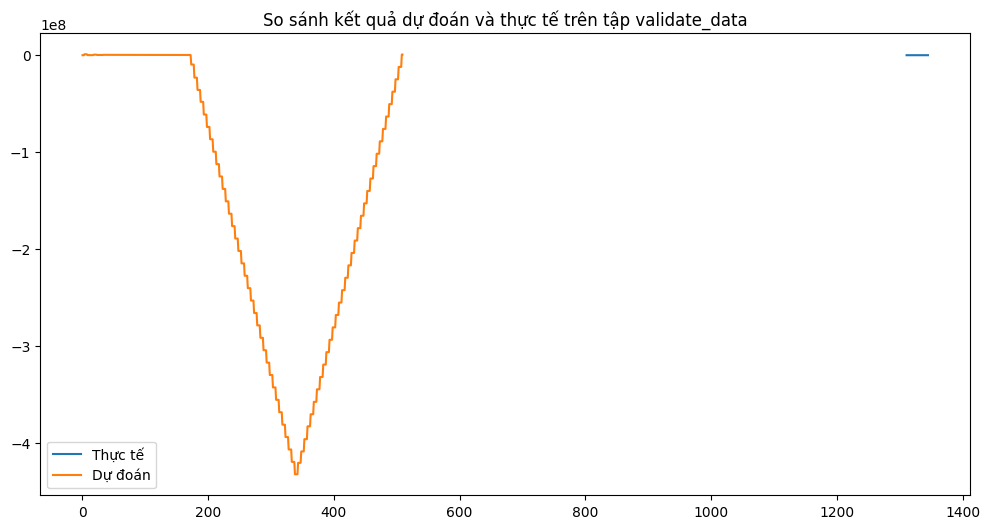

In [32]:
validate_data.index = range(len(train_data)+len(test_data), len(train_data)+len(test_data)+len(validate_data))

plt.figure(figsize=(12, 6))
plt.plot(validate_data['Price'], label='Thực tế')
plt.plot(pred_validate, label='Dự đoán')
plt.legend()
plt.title('So sánh kết quả dự đoán và thực tế trên tập validate_data')
plt.show()

# Bước 8: Dự đoán Price cho tương lai

In [33]:
import pandas as pd
from datetime import datetime, timedelta

# Chọn ngày bắt đầu và số ngày dự đoán

In [34]:
start_date = datetime.strptime('2023-05-01', '%Y-%m-%d')
num_days = 7

# Tạo DataFrame để lưu trữ kết quả dự đoán

In [35]:
future_data = pd.DataFrame(index=range(num_days), columns=['date', 'Price'])

# Dự đoán và gán giá trị Price cho từng ngày trong tương lai

In [36]:
prev_obs = df.tail(1)[['Open', 'High', 'Low', 'Vol.', 'Change %']].values
for i in range(num_days):
    # Dự đoán bước sai lệch
    pred_diff = results.predict(steps=1, alpha=0.05)
    # Chuyển về kết quả dự đoán ban đầu
    pred = prev_obs[0] + cumsum(pred_diff[0])
    # Gán kết quả dự đoán cho ngày tiếp theo
    future_data.loc[i, 'Price'] = pred[-1]
    # Tính lại prev_obs để sử dụng cho dự đoán ngày kế tiếp
    prev_obs = pred.reshape(1, -1)
    # Gán ngày cho từng dòng
    future_data.loc[i, 'date'] = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')

# In kết quả dự đoán


In [37]:
print(future_data)

         date           Price
0  2023-05-01   952444.808133
1  2023-05-02  1904889.620265
2  2023-05-03  2857334.432398
3  2023-05-04  3809779.244531
4  2023-05-05  4762224.056663
5  2023-05-06  5714668.868796
6  2023-05-07  6667113.680929


# Bước 9: Vẽ đồ thị dự đoán Price trong tương lai

In [38]:
pred_test_series = pd.Series(pred_test)
pred_validate_series = pd.Series(pred_validate)

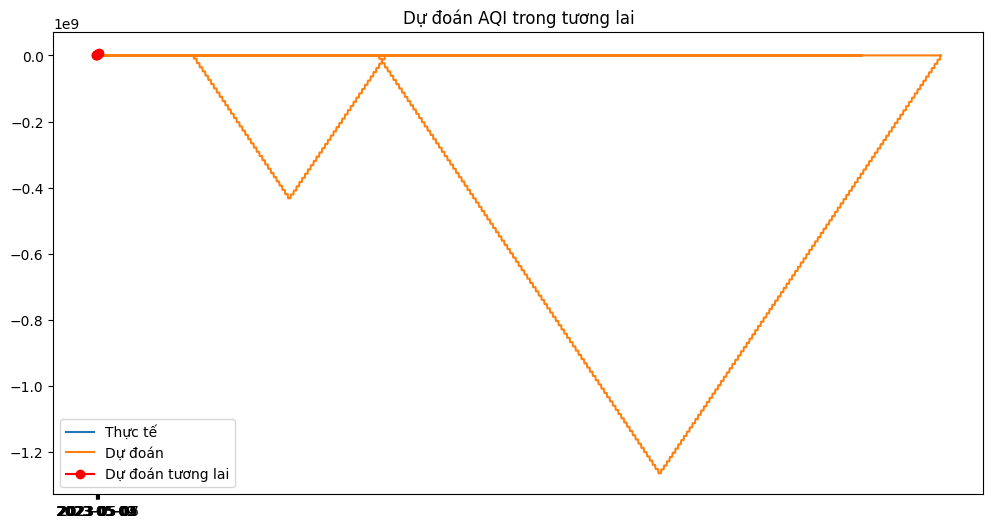

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Thực tế')
pl=pd.concat([df['Price'].iloc[:-1], pred_test_series, pred_validate_series])
plt.plot(pl, label='Dự đoán')
plt.plot(future_data['date'], future_data['Price'], 'ro-', label='Dự đoán tương lai')
plt.legend()
plt.title('Dự đoán AQI trong tương lai')
plt.show()

# Bước 10: Lưu mô hình VECM


In [40]:
import pickle

with open('vecm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Bước 11: Load mô hình VECM

In [41]:
with open('vecm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Kiểm tra xem mô hình load có giống với mô hình đã train không

In [42]:
print(loaded_model.params)

AttributeError: 'VECM' object has no attribute 'params'